Here is a dataset on traffic violations that was retrieved from the Kaggle website. This dataset has information about the stop date, stop time, driver gender, driver birth year, driver age, driver race, violation, if there was a search conducted, outcome of the stop, if arrested or not, and if stop was drug related. 

In this project, I will analyze this dataset and search for viable information that can help with better understanding the data. In this project I will demonstrate how to read data into a dataframe utilizing the pandas library, how to use for loops to check all rows in all columns for duplicated, unique and null values, cleaning data by removing unneccessary columns, dropping null values, removing special characters from values, creating new columns, updating datatypes to correct formats, and extracting date, month, and year from a datetime column. 

After all of the data cleaning has been performed, I will then begin answering a few questions and exploring the data. After that is completed, I will visualize my findings and answers through a variety of graphs and charts. 

Questions to be answered:

1) What year had the most traffic violations? - by gender/race?

2) What month had the most traffic violations? - by gender/race?

3) What day had the most traffic violations? - by gender/race?

4) What is the min/avg/max age by gender? - by race?

5) What is the most common violation by gender? - by race/age?

6) Was a search conducted by gender? - by race?

7) What was the stop outcome by gender? - by race?

8) Was an arrest made by gender? - by race?

9) What was the avg stop duration by gender? - by race?

10) How many drug related stops were there by gender? - by race?


Ok, lets begin our data cleaning and analysis!

Lets begin by importing the proper libraries and setting some options neccessary for analysis and visualizations.

In [1]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt 
from matplotlib import style
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px 
style.use("ggplot")


Reading data to be used for analysis into a dataframe.

In [2]:
traffic_violations = pd.read_csv(r"C:\Users\Jason\OneDrive\traffic_violaions.csv")
# traffic_violations = pd.read_csv(r"C:\Users\mjaso\OneDrive\traffic_violaions.csv")

Taking a look at the size of the dataset - it can be useful to get a sense of how many rows and columns that you will be working with.

In [3]:
traffic_violations.shape
print(f"There are {traffic_violations.shape[0]} rows and {traffic_violations.shape[1]} columns of data within this dataset.")

There are 52966 rows and 15 columns of data within this dataset.


Viewing the first 3 rows of the dataset - to get a visual of what the values look like. 

In [4]:
traffic_violations.head(3)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


Viewing the last 3 rows of the dataset - to check and compare for consistency within the data

Here I noticed that the last row of data has a value in the date column that is not in the same format as the other date values. Additionally, there is no values in any column for this row. I will address this later.

In [5]:
traffic_violations.tail(3)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False
52964,10/5/2011,7:19,NaN,F,1986.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
52965,5-Oct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I'll check for duplicated data, and delete if detected.

In [6]:
traffic_violations.duplicated().sum()
print(f"There are {traffic_violations.duplicated().sum()} rows of duplicated data.")

There are 286 rows of duplicated data.


So I've noticed that there are over 200 rows of duplicated data. Let me remove the duplicates and recheck that all duplicates have been removed.

In [7]:
traffic_violations.drop_duplicates(inplace=True)
print(f"There are now {traffic_violations.duplicated().sum()} rows of duplicated data.")

There are now 0 rows of duplicated data.


Lets look at how many unique values each column has.

I perform this action by using a for loop to loop through every column in the dataset to count and return the number of unique values per column, and then print the results.

In [8]:
for col in traffic_violations.columns:
    unique_cols = traffic_violations[col].nunique()
    print(f"The column {col} has {unique_cols} unique values.")

The column stop_date has 2223 unique values.
The column stop_time has 1427 unique values.
The column country_name has 0 unique values.
The column driver_gender has 2 unique values.
The column driver_age_raw has 91 unique values.
The column driver_age has 72 unique values.
The column driver_race has 5 unique values.
The column violation_raw has 11 unique values.
The column violation has 5 unique values.
The column search_conducted has 2 unique values.
The column search_type has 23 unique values.
The column stop_outcome has 6 unique values.
The column is_arrested has 2 unique values.
The column stop_duration has 3 unique values.
The column drugs_related_stop has 2 unique values.


I will now look at how many null values are in each column.

I will use the exact method as above to check for the number of null values and then print the results.

In [9]:
for na in traffic_violations.columns:
    na_vals = traffic_violations[na].isna().sum()
    print(f"The column {na} has {na_vals} NaN values.")

The column stop_date has 0 NaN values.
The column stop_time has 1 NaN values.
The column country_name has 52680 NaN values.
The column driver_gender has 3269 NaN values.
The column driver_age_raw has 3261 NaN values.
The column driver_age has 3503 NaN values.
The column driver_race has 3268 NaN values.
The column violation_raw has 3268 NaN values.
The column violation has 3268 NaN values.
The column search_conducted has 1 NaN values.
The column search_type has 50604 NaN values.
The column stop_outcome has 3268 NaN values.
The column is_arrested has 3268 NaN values.
The column stop_duration has 3268 NaN values.
The column drugs_related_stop has 1 NaN values.


The columns country_name, and search_type have an unusual amount of null values, so I will remove those columns for the purpose of this analysis.

In [10]:
traffic_violations.drop(columns=["country_name", "search_type"], inplace=True)

I will now check to make sure that the targeted columns have been removed by viewing the columns of the dataset. 

In [11]:
traffic_violations.columns 

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

Ok, perfect. Those columns have been dropped from the dataframe.

As I mentioned earlier, I noticed that the last row of data seems to be out of place, so I will remove that row from the dataset and recheck to verify that the changes were updated.

In [12]:
traffic_violations.drop(index=52965, inplace=True)
traffic_violations.tail(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
52962,10/5/2011,6:43,M,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
52963,10/5/2011,6:49,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False
52964,10/5/2011,7:19,F,1986.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


Now I will get rid of the colon in the stop_time column - this can be useful in the case that I wanted to do any calculations on this column.

In [13]:
traffic_violations["stop_time"] = traffic_violations["stop_time"].str.replace(":", "", regex=True) 

Quick look at a few rows of data to verify that the changes were made correctly.

In [14]:
traffic_violations.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,155,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,815,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,2315,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


Examining the data types in the dataset - a good and quick way to get a look at the datatypes for each column in the dataframe.

In [15]:
traffic_violations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52679 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           52679 non-null  object 
 1   stop_time           52679 non-null  object 
 2   driver_gender       49411 non-null  object 
 3   driver_age_raw      49419 non-null  float64
 4   driver_age          49177 non-null  float64
 5   driver_race         49412 non-null  object 
 6   violation_raw       49412 non-null  object 
 7   violation           49412 non-null  object 
 8   search_conducted    52679 non-null  object 
 9   stop_outcome        49412 non-null  object 
 10  is_arrested         49412 non-null  object 
 11  stop_duration       49412 non-null  object 
 12  drugs_related_stop  52679 non-null  object 
dtypes: float64(2), object(11)
memory usage: 5.6+ MB


Upon review, some data cleaning will be neccessary to ensure each column has the correct data types. I will also extract and create seperate year, month and day columns for enhanced analysis and change float datatypes to integer datatypes...but first I will need to remove the null values from from the float datatypes.

In [16]:
traffic_violations.dropna(subset=["driver_age_raw"], inplace=True)
traffic_violations.dropna(subset=["driver_age"], inplace=True)

Now that that is complete, it is time to add some additional columns, change some datatypes, and remove an unneccessary column.

In [17]:
traffic_violations["stop_date"] = pd.to_datetime(traffic_violations["stop_date"])
traffic_violations["stop_year"] = traffic_violations["stop_date"].dt.year
traffic_violations["stop_month"] = traffic_violations["stop_date"].dt.month
traffic_violations["stop_day"] = traffic_violations["stop_date"].dt.day_name()
traffic_violations["driver_birth_year"] = traffic_violations["driver_age_raw"].astype(int)
traffic_violations["driver_age"] = traffic_violations["driver_age"].astype(int)
traffic_violations.drop(columns=["driver_age_raw"], inplace=True)

Lets check to verify that the changes were made.

In [18]:
traffic_violations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49177 entries, 0 to 52964
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           49177 non-null  datetime64[ns]
 1   stop_time           49177 non-null  object        
 2   driver_gender       49171 non-null  object        
 3   driver_age          49177 non-null  int32         
 4   driver_race         49172 non-null  object        
 5   violation_raw       49172 non-null  object        
 6   violation           49172 non-null  object        
 7   search_conducted    49177 non-null  object        
 8   stop_outcome        49172 non-null  object        
 9   is_arrested         49172 non-null  object        
 10  stop_duration       49172 non-null  object        
 11  drugs_related_stop  49177 non-null  object        
 12  stop_year           49177 non-null  int64         
 13  stop_month          49177 non-null  int64     

Perfect, all datatypes have been updated, specific columns have been added and removed, as well as all null values. 

Now let me examine the number of rows and columns of the dataset to after performing some data cleaning and data manipulation. 

In [19]:
print(f"The dataset now has {traffic_violations.shape[0]} rows and {traffic_violations.shape[1]} columns after removing all null values and adding additional columns.")

The dataset now has 49177 rows and 16 columns after removing all null values and adding additional columns.


I will now take a look at the first few rows of data to verify that all columns and rows are satisfactory.

In [20]:
traffic_violations.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_year,stop_month,stop_day,driver_birth_year
0,2005-01-02,155,M,20,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1,Sunday,1985
1,2005-01-18,815,M,40,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1,Tuesday,1965
2,2005-01-23,2315,M,33,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,1,Sunday,1972
3,2005-02-20,1715,M,19,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,2005,2,Sunday,1986
4,2005-03-14,1000,F,21,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,2005,3,Monday,1984


Ok, now the data cleaning, manipulation and transformation portion of this project has been completed. I will now move on to exploratory analysis, question answering and visualizations in search of trends and finding insights.

1) What year had the most traffic violations?

In [21]:
traffic_violations["stop_year"].value_counts()

2006    10059
2007     8827
2008     8053
2009     7186
2010     6945
2011     5640
2005     2467
Name: stop_year, dtype: int64

The line chart shows us that the year 2006 had the most number of traffic violations with over 10,000.


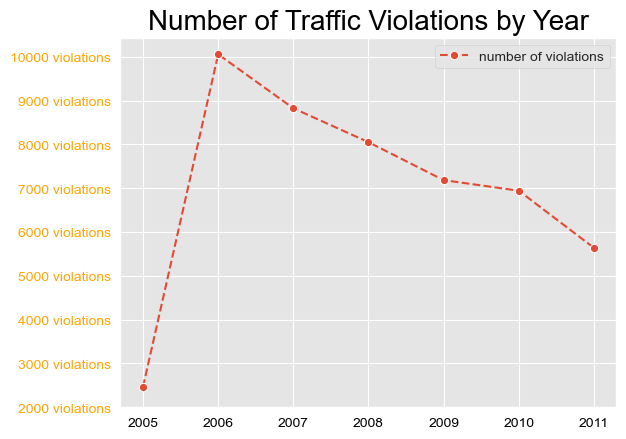

In [22]:
most_violations_by_year = traffic_violations["stop_year"].value_counts()
sns.lineplot(data=most_violations_by_year,
              linestyle="--",
                marker="o",
                  label="line with marker")
plt.title("Number of Traffic Violations by Year",
           color="black", 
           fontsize=20)
ticks = list(range(2000, 11000, 1000))
plt.yticks(ticks, [f"{x} violations" for x in ticks],
            color="orange")
n = ["number of violations"]
plt.legend(n)
plt.ylabel("")
plt.xticks(color="black") 
print("The line chart shows us that the year 2006 had the most number of traffic violations with over 10,000.")

2) What year had the most traffic violations by race? 

In [23]:
traffic_violations.groupby("driver_race")["stop_year"].value_counts()

driver_race  stop_year
Asian        2006          276
             2007          239
             2008          225
             2009          214
             2011          167
             2010          162
             2005           84
Black        2006         1197
             2009         1116
             2008         1084
             2010         1021
             2007         1009
             2011          811
             2005          294
Hispanic     2009          851
             2008          838
             2010          808
             2007          672
             2011          638
             2006          195
             2005           54
Other        2010           29
             2009           25
             2006           24
             2007           24
             2008           23
             2011           13
             2005            9
White        2006         8364
             2007         6882
             2008         5883
             200

2006 saw the highest number of violations for blacks, whites, and asians while 2009 saw the highest violations for hispanics.


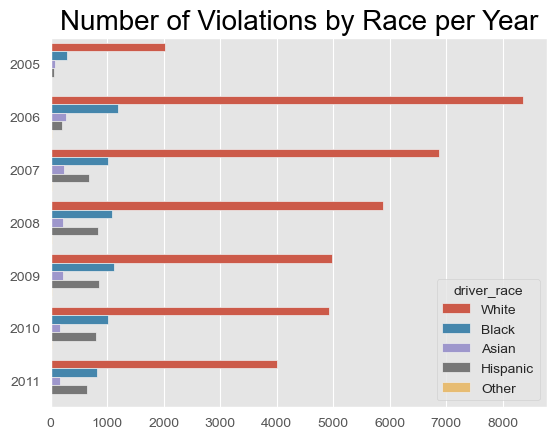

In [24]:
most_violations_by_race_year = traffic_violations.groupby(["driver_gender", "driver_race"])["stop_year"].value_counts()
sns.countplot(data=traffic_violations, 
              y="stop_year",
              hue="driver_race")
plt.title("Number of Violations by Race per Year", 
          color="black", 
          fontsize="20")
plt.ylabel("") 
plt.xlabel("") 
print("2006 saw the highest number of violations for blacks, whites, and asians while 2009 saw the highest violations for hispanics.")

3) What year had the most traffic violations by gender?

In [25]:
traffic_violations.groupby("driver_gender")["stop_year"].value_counts()

driver_gender  stop_year
F              2006         2765
               2007         2503
               2008         2108
               2010         1824
               2009         1704
               2011         1398
               2005          643
M              2006         7290
               2007         6323
               2008         5945
               2009         5482
               2010         5121
               2011         4242
               2005         1823
Name: stop_year, dtype: int64

The year 2006 had the highest violations for both the male and female gender.


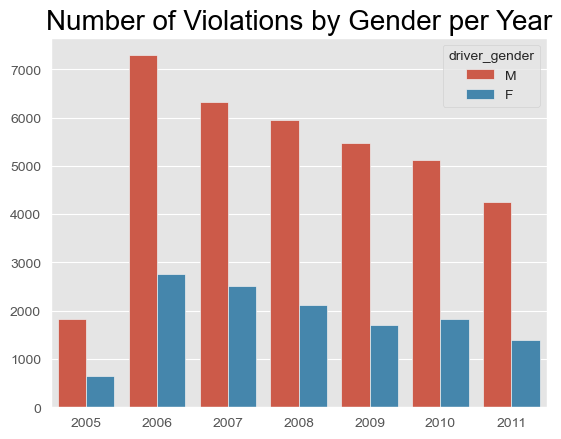

In [26]:
most_violations_by_gender = traffic_violations.groupby("driver_race")["stop_year"].value_counts()
sns.countplot(data=traffic_violations,
               x="stop_year", 
               hue="driver_gender")
plt.title("Number of Violations by Gender per Year", 
          color="black",
            fontsize=20) 
plt.ylabel("")
plt.xlabel("")
print("The year 2006 had the highest violations for both the male and female gender.")

4) What month had the most traffic violations?

In [27]:
traffic_violations["stop_month"].value_counts()

1     4622
5     4339
11    4227
6     4177
4     4141
7     4086
3     4066
10    4011
8     4004
9     3936
2     3843
12    3725
Name: stop_month, dtype: int64

January receives the highest number of violations, while december receives the least number of violations.


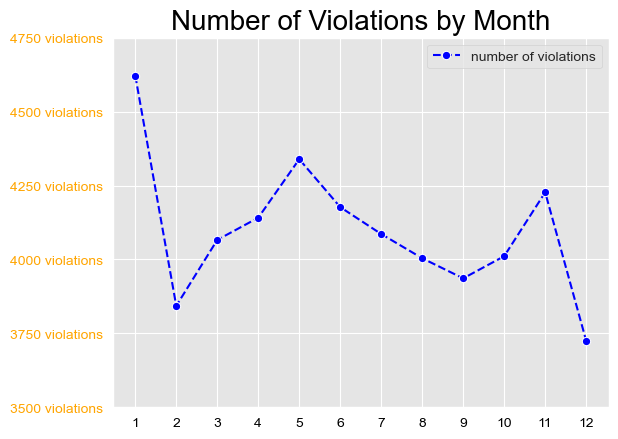

In [28]:
most_violations_by_month = traffic_violations["stop_month"].value_counts()
sns.lineplot(data=most_violations_by_month,
             linestyle="--",
             marker="o",
             label="line with marker",
             color="blue")
plt.title("Number of Violations by Month", 
          fontsize=20,
          color="black") 
n = ["number of violations"]
plt.legend(n)
plt.ylabel("")
ticks = list(range(3500, 5000, 250)) 
plt.yticks(ticks, [f"{x} violations" for x in ticks],
           color="orange") 
plt.xlabel("") 
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
            ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"],
            color="black") 
print("January receives the highest number of violations, while december receives the least number of violations.")


5) What month had the most traffic violations by race?

In [29]:
pd.set_option("display.max_rows", None)
traffic_violations.groupby("driver_race")["stop_month"].value_counts()

driver_race  stop_month
Asian        1              134
             5              134
             11             133
             4              121
             6              120
             3              117
             8              113
             9              106
             10             105
             7              103
             2               94
             12              87
Black        12             592
             5              571
             4              567
             7              567
             1              564
             3              554
             8              536
             6              534
             9              524
             11             524
             2              504
             10             495
Hispanic     7              385
             6              384
             5              383
             8              376
             4              368
             3              345
             9  

For asians, the months January and May saw had the most violations with 134 violations. For blacks, the month December had the
most violations with 592. For hispanics, the month July had the most violations with 385. While the month of January had the most 
violations for whites with 3,596.


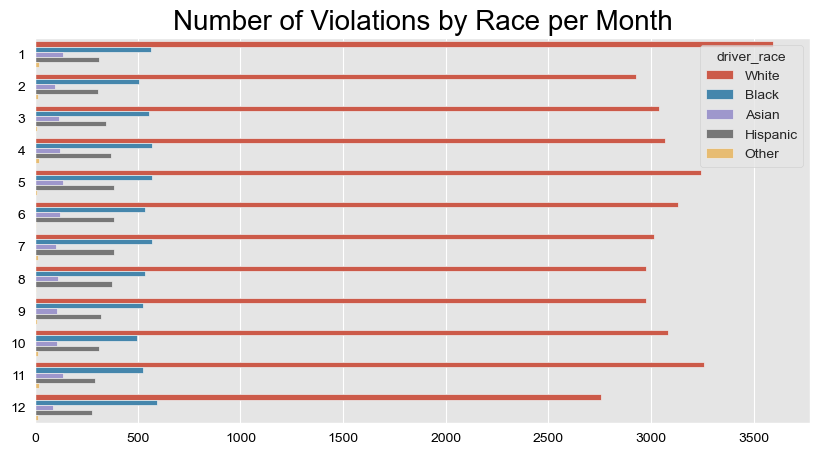

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=traffic_violations, y="stop_month", hue="driver_race")
plt.title("Number of Violations by Race per Month", 
          fontsize=20,
          color="black")
plt.ylabel("") 
plt.yticks(color="black") 
plt.xlabel("") 
plt.xticks(color="black") 
print("""For asians, the months January and May saw had the most violations with 134 violations. For blacks, the month December had the
most violations with 592. For hispanics, the month July had the most violations with 385. While the month of January had the most 
violations for whites with 3,596.""")

6) What month had the most traffic violations by gender?

In [31]:
traffic_violations.groupby("driver_gender")["stop_month"].value_counts()

driver_gender  stop_month
F              1             1267
               11            1167
               5             1134
               4             1132
               3             1103
               6             1078
               10            1056
               7             1041
               9             1030
               2             1029
               8              994
               12             914
M              1             3353
               5             3204
               6             3098
               11            3060
               7             3045
               4             3009
               8             3009
               3             2963
               10            2954
               9             2906
               2             2814
               12            2811
Name: stop_month, dtype: int64

The month of January has the highest number of violations for both males and females.


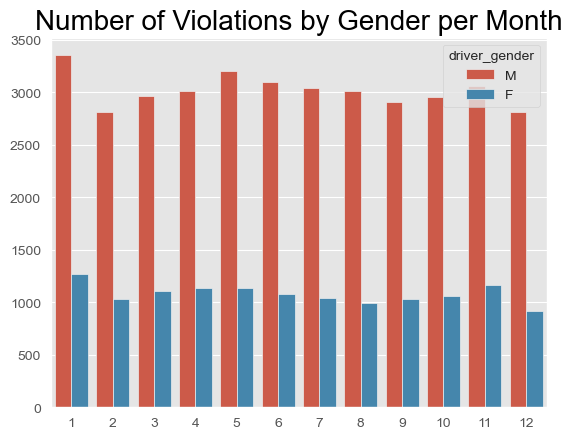

In [32]:
traffic_violations.groupby("driver_gender")["stop_month"].value_counts()
sns.countplot(data=traffic_violations,
               x="stop_month",
                 hue="driver_gender")
plt.title("Number of Violations by Gender per Month",
          fontsize=20,
          color="black")
plt.ylabel("")
plt.xlabel("")
print("The month of January has the highest number of violations for both males and females.")

7) What day had the most traffic violations?

In [33]:
traffic_violations["stop_day"].value_counts()

Tuesday      7230
Monday       7157
Saturday     7150
Wednesday    7107
Friday       6884
Thursday     6861
Sunday       6788
Name: stop_day, dtype: int64

Tuesdays have the highest number of violations and Sundays experience the lowest number of violations.


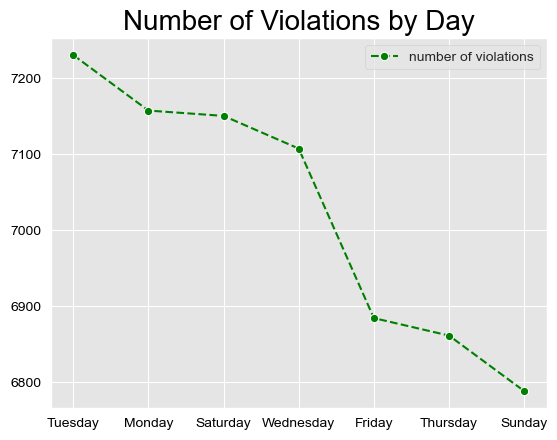

In [34]:
most_violations_by_day = traffic_violations["stop_day"].value_counts()
sns.lineplot(data=most_violations_by_day,
             linestyle="--",
             marker="o",
             label="line with marker",
             color="green")
plt.title("Number of Violations by Day",
          color="black",
          fontsize=20)
n = ["number of violations"]
plt.legend(n)
plt.ylabel("") 
plt.yticks(color="black") 
plt.xlabel("") 
plt.xticks(color="black") 
print("Tuesdays have the highest number of violations and Sundays experience the lowest number of violations.")

8) What day had the most traffic violations by race?

In [35]:
traffic_violations.groupby("driver_race")["stop_day"].value_counts()

driver_race  stop_day 
Asian        Sunday        217
             Monday        214
             Saturday      211
             Tuesday       203
             Wednesday     196
             Friday        164
             Thursday      162
Black        Monday        987
             Thursday      975
             Tuesday       937
             Wednesday     930
             Saturday      912
             Sunday        906
             Friday        885
Hispanic     Sunday        624
             Monday        620
             Saturday      610
             Tuesday       594
             Wednesday     575
             Friday        519
             Thursday      514
Other        Saturday       35
             Sunday         21
             Monday         20
             Wednesday      20
             Friday         19
             Thursday       17
             Tuesday        15
White        Tuesday      5481
             Wednesday    5386
             Saturday     5381
             Mon

Asians and Hispanics experience the most violations on Sundays. Blacks experience the most violations on Mondays. While whites 
experience the most violations on Tuesdays.


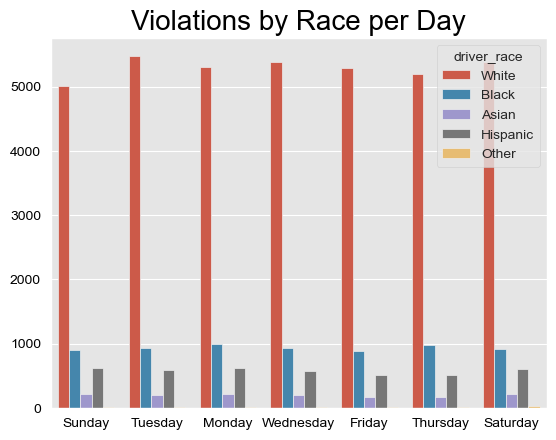

In [36]:
sns.countplot(data=traffic_violations,
              x="stop_day",
              hue="driver_race") 
plt.title("Violations by Race per Day",
          fontsize=20,
          color="black") 
ticks = list(range(0,6000,1000))
plt.yticks(ticks, [f"{x}" for x in ticks],
           color="black")
plt.ylabel("") 
plt.xlabel("") 
plt.xticks(color="black") 
print("""Asians and Hispanics experience the most violations on Sundays. Blacks experience the most violations on Mondays. While whites 
experience the most violations on Tuesdays.""")

9) What day had the most traffic violations by gender? 

In [37]:
traffic_violations.groupby("driver_gender")["stop_day"].value_counts()

driver_gender  stop_day 
F              Friday       1899
               Sunday       1897
               Saturday     1895
               Monday       1882
               Tuesday      1839
               Wednesday    1796
               Thursday     1737
M              Tuesday      5391
               Wednesday    5311
               Monday       5273
               Saturday     5254
               Thursday     5123
               Friday       4984
               Sunday       4890
Name: stop_day, dtype: int64

Males eperience the most violations on Tuesdays, while females experience the most violations on Fridays.


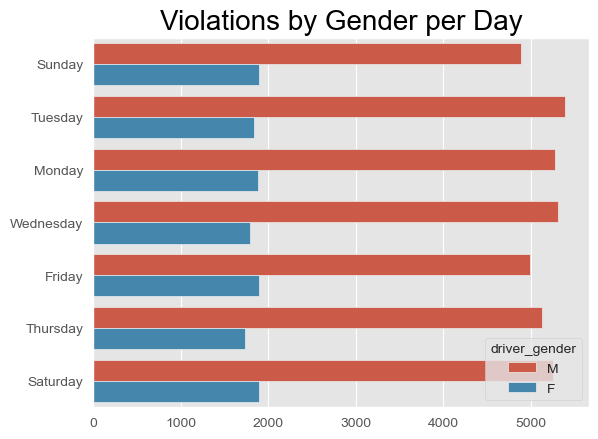

In [38]:
sns.countplot(data=traffic_violations,
              y="stop_day",
              hue="driver_gender")
plt.title("Violations by Gender per Day",
          color="black",
          fontsize=20)
plt.ylabel("") 
plt.xlabel("") 
print("Males eperience the most violations on Tuesdays, while females experience the most violations on Fridays.")

10) What is the min/avg/max age by race?

In [39]:
traffic_violations.groupby("driver_race")["driver_age"].agg(["min", "mean", "max"])

,min,mean,max
driver_race,,,
Asian,17,33.577176,82
Black,15,33.880282,80
Hispanic,15,32.230523,76
Other,18,33.877551,65
White,15,34.471082,88


The white race has the highest average age per violation. While the hispanic race has the lowest average age per violation.


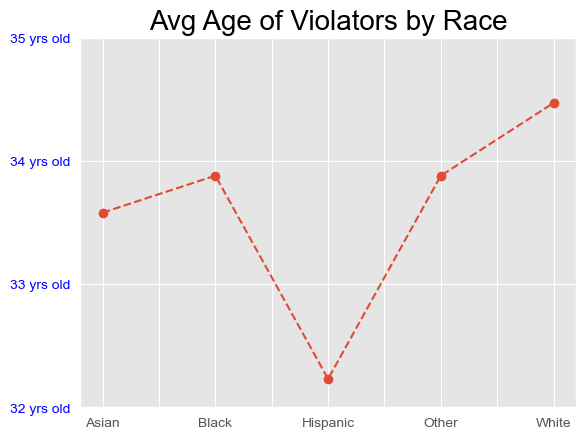

In [40]:
round(traffic_violations.groupby("driver_race")["driver_age"].mean(), 2).plot(linestyle="--",
                                                                              marker="o")
plt.title("Avg Age of Violators by Race", 
          fontsize=20,
          color="black")
plt.xlabel("") 
ticks = list(range(32, 36, 1))
plt.yticks(ticks, [f"{x} yrs old" for x in ticks], color="blue") 
print("The white race has the highest average age per violation. While the hispanic race has the lowest average age per violation.")

11) What is the min/avg/max age by gender?

In [41]:
traffic_violations.groupby("driver_gender")["driver_age"].agg(["min", "mean", "max"])

,min,mean,max
driver_gender,,,
F,15,32.307918,84
M,15,34.850798,88


The average for female violators is around 32 years old while the average age for male violators is closer to 35 years old.


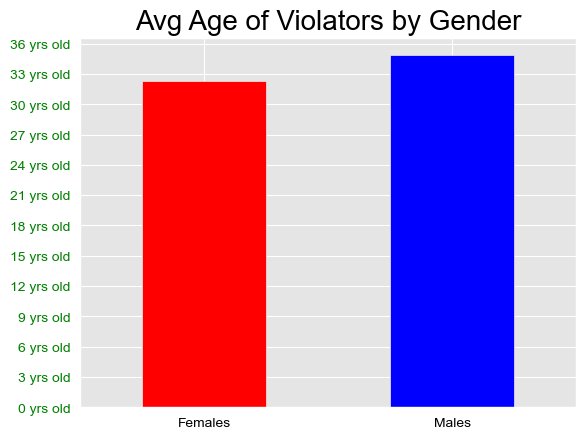

In [42]:
c = ["red", "blue"]
traffic_violations.groupby("driver_gender")["driver_age"].mean().plot(kind="bar", 
                                                                      color=c,
                                                                      rot=0) 
plt.title("Avg Age of Violators by Gender", 
          color="black",
          fontsize=20) 
ages = list(range(0,39,3))
plt.yticks(ages, [f"{a} yrs old" for a in ages], 
           color="green") 
plt.xlabel("") 
plt.xticks([0,1], 
           ["Females", "Males"],
           color="black")
print("The average for female violators is around 32 years old while the average age for male violators is closer to 35 years old.")


12) What is the most common violation by race?

In [43]:
traffic_violations.groupby("driver_race")["violation"].value_counts()

driver_race  violation          
Asian        Speeding                1030
             Moving violation         162
             Equipment                 92
             Other                     58
             Registration/plates       25
Black        Speeding                3109
             Moving violation        1512
             Equipment                855
             Other                    633
             Registration/plates      423
Hispanic     Speeding                1682
             Moving violation        1008
             Equipment                649
             Other                    362
             Registration/plates      355
Other        Speeding                  88
             Moving violation          32
             Other                     19
             Equipment                  7
             Registration/plates        1
White        Speeding               26056
             Moving violation        5592
             Equipment               2653
 

Speeding is the most common violation for all races and registration/plates is the least common violation for all races.


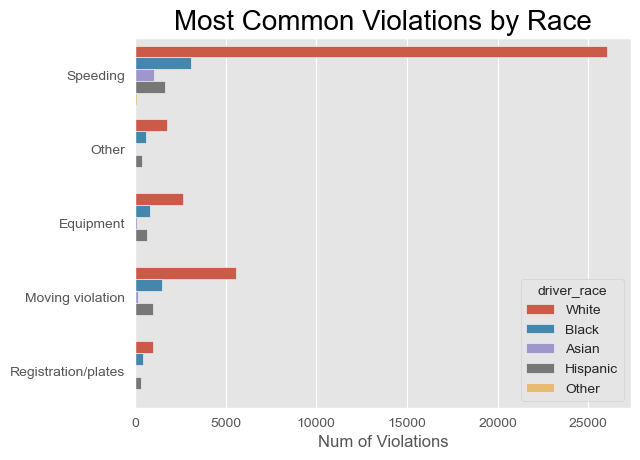

In [44]:
sns.countplot(data=traffic_violations,
              y="violation",
              hue="driver_race") 
plt.title("Most Common Violations by Race",
      fontsize=20,
      color="black") 
plt.xlabel("Num of Violations")
plt.ylabel("") 
print("Speeding is the most common violation for all races and registration/plates is the least common violation for all races.")

13) What is the most common violation by gender? 

In [45]:
traffic_violations.groupby("driver_gender")["violation"].value_counts()

driver_gender  violation          
F              Speeding                9865
               Moving violation        1381
               Equipment                851
               Registration/plates      498
               Other                    350
M              Speeding               22099
               Moving violation        6925
               Equipment               3405
               Other                   2495
               Registration/plates     1302
Name: violation, dtype: int64

The most common violation by both male and female genders is speeding.


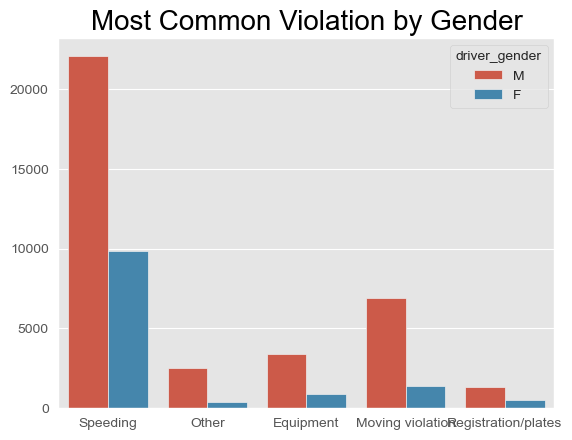

In [46]:
sns.countplot(data=traffic_violations,
              x="violation",
              hue="driver_gender") 
plt.title("Most Common Violation by Gender",
          fontsize=20,
          color="black") 
plt.ylabel("") 
plt.xlabel("") 
print("The most common violation by both male and female genders is speeding.")

14) What is the percentage of search's conducted?

In [47]:
traffic_violations["search_conducted"].value_counts()

False    47103
True      2074
Name: search_conducted, dtype: int64

The percentage of searches conducted was 4.2%.


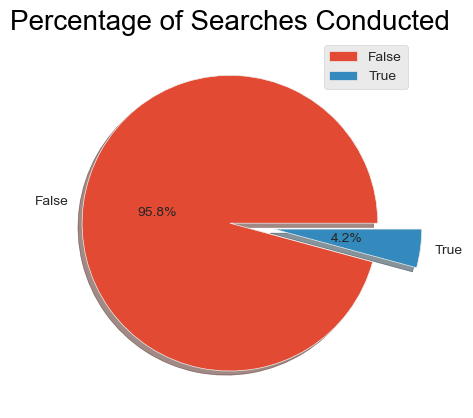

In [48]:
e = [0, 0.3]
traffic_violations["search_conducted"].value_counts().plot(kind="pie",
                                                           shadow=True,
                                                           autopct="%1.1f%%",
                                                           explode=e,
                                                           pctdistance=0.5,)
plt.title("Percentage of Searches Conducted",
          fontsize=20,
          color="black")
plt.ylabel("")
plt.legend()
sns.set_style("darkgrid")
style.use("ggplot") 
print("The percentage of searches conducted was 4.2%.")

15) What is the percentage of searched conducted by race? 

Whites had the highest percentage of searches conducted by race during traffic stops at 57.8%.


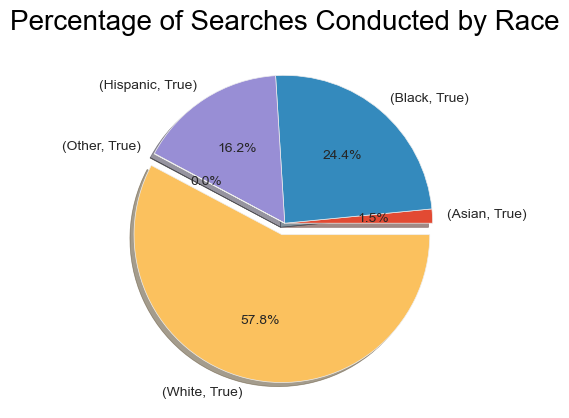

In [49]:
e = [0,0,0,0,0.08]
traffic_violations[traffic_violations["search_conducted"] == True].groupby("driver_race")["search_conducted"].value_counts().plot(kind="pie",
                                                                                                                                  shadow=True,
                                                                                                                                  autopct="%1.1f%%",
                                                                                                                                  explode=e)
plt.title("Percentage of Searches Conducted by Race",
          fontsize=20,
          color="black")
plt.ylabel("") 
plt.xticks(color="black") 
print("Whites had the highest percentage of searches conducted by race during traffic stops at 57.8%.")
style.use("ggplot") 


16) What is the percentage of searches conducted by gender?

The percentage of searches conducted on male drivers is 3.6% and the percentage of searches conductd on female drivers is 0.6%.


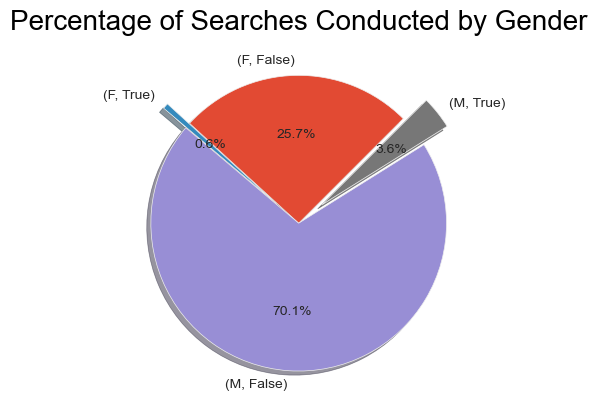

In [50]:
e = [0, 0.2, 0, 0.2]
traffic_violations.groupby("driver_gender")["search_conducted"].value_counts().plot(kind="pie",
                                                                                    shadow=True,
                                                                                    autopct="%1.1f%%",
                                                                                    explode=e,
                                                                                    startangle=45)
plt.title("Percentage of Searches Conducted by Gender",
          color="black",
          fontsize=20)
plt.ylabel("")
plt.xticks(color="black") 
print("The percentage of searches conducted on male drivers is 3.6% and the percentage of searches conductd on female drivers is 0.6%.")


17) What is the most common stop outcome?

Citations are the most common stop outcome.


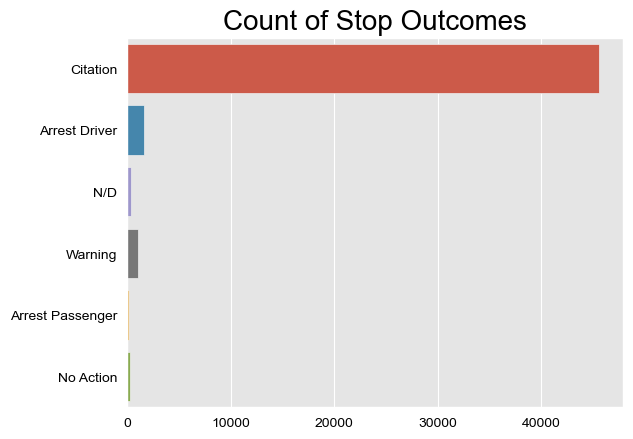

In [51]:
sns.countplot(data=traffic_violations,
              y="stop_outcome") 
plt.title("Count of Stop Outcomes",
          fontsize=20,
          color="black") 
plt.ylabel("")
plt.yticks(color="black") 
plt.xlabel("") 
plt.xticks(color="black") 
print("Citations are the most common stop outcome.") 

18) What year had the highest number of arrest?

In [52]:
arrest_by_year = traffic_violations[traffic_violations["is_arrested"] == True].groupby("is_arrested")["stop_year"].value_counts()
arrest_by_year

is_arrested  stop_year
True         2006         451
             2009         279
             2007         259
             2010         253
             2008         216
             2011         210
             2005         174
Name: stop_year, dtype: int64

The year 2006 experienced the most amount of arrest whilel the year 2005 experiencd the least amount of arrest.


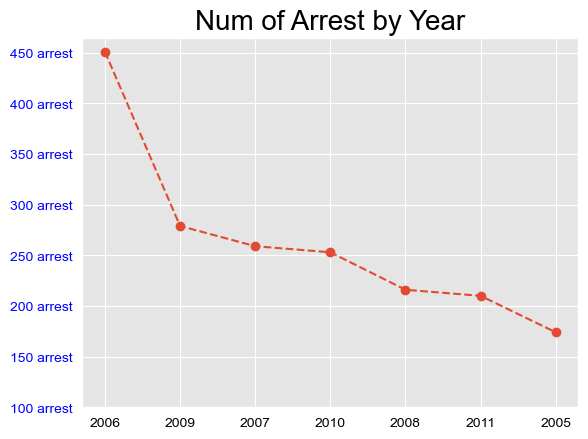

In [53]:
arrest_by_year.plot(kind="line",
                    linestyle="--",
                    marker="o",
                    label="line with marker")
plt.title("Num of Arrest by Year",
          fontsize=20,
          color="black")
arrest = list(range(100,500,50))
plt.yticks(arrest, [f"{a} arrest" for a in arrest],
           color="blue") 
plt.xlabel("") 
plt.xticks([0,1,2,3,4,5,6],
           ["2006", "2009", "2007","2010","2008","2011","2005"],
           color="black") 
print("The year 2006 experienced the most amount of arrest whilel the year 2005 experiencd the least amount of arrest.")


19) How many total arrest were made every year by race?

In [54]:
traffic_violations[traffic_violations["is_arrested"] == True].groupby("driver_race")["stop_year"].value_counts()

driver_race  stop_year
Asian        2006           9
             2007           6
             2008           5
             2010           4
             2005           3
             2011           3
Black        2006         136
             2010          64
             2009          58
             2005          57
             2007          52
             2008          47
             2011          37
Hispanic     2009          55
             2008          50
             2007          46
             2010          45
             2011          39
             2006          16
             2005          13
Other        2009           2
White        2006         290
             2009         164
             2007         155
             2010         140
             2011         131
             2008         114
             2005         101
Name: stop_year, dtype: int64

The year 2006 held the highest arrest year for the asian, black and white races. While the year 2009 held the highest for 
hispanics.


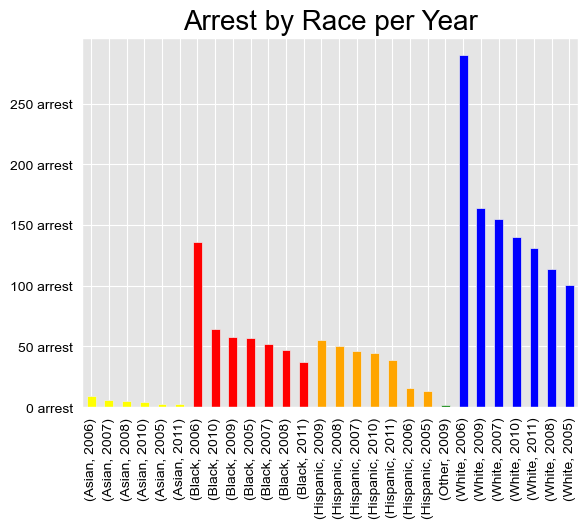

In [55]:
c = ["yellow", "yellow", "yellow", "yellow", "yellow" ,"yellow",
     "red", "red", "red", "red", "red", "red", "red",
     "orange", "orange", "orange", "orange", "orange" ,"orange", "orange",
     "green",
     "blue", "blue", "blue", "blue", "blue", "blue", "blue"]
traffic_violations[traffic_violations["is_arrested"] == True].groupby("driver_race")["stop_year"].value_counts().plot(kind="bar",
                                                                                                                      color=c)
plt.title("Arrest by Race per Year", 
          fontsize=20,
          color="black") 
arrest = list(range(0,300,50))
plt.yticks(arrest, [f"{a} arrest" for a in arrest],
           color="black") 
plt.xticks(color="black")
plt.xlabel("") 
print("""The year 2006 held the highest arrest year for the asian, black and white races. While the year 2009 held the highest for 
hispanics.""") 



20) How many total arrest were made every month by gender?

In [56]:
traffic_violations[traffic_violations["is_arrested"] == True].groupby("driver_gender")["stop_month"].value_counts()

driver_gender  stop_month
F              1              40
               6              34
               12             32
               2              30
               9              30
               4              29
               5              29
               8              28
               10             28
               3              27
               7              27
               11             26
M              12            158
               7             145
               1             142
               10            138
               4             126
               11            124
               2             123
               3             119
               5             114
               8             112
               6              91
               9              90
Name: stop_month, dtype: int64

The month of December saw the highest amount of arrest for male drivers and the month of January saw the highest amount of arrest 
for female drivers.


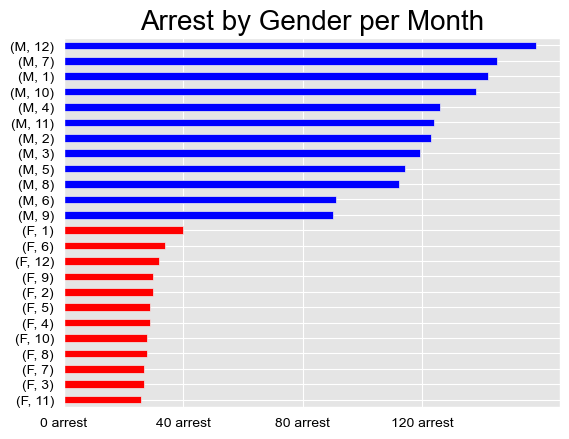

In [57]:
c = ["red","red","red","red","red","red","red","red","red","red","red","red",
     "blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue"]
traffic_violations[traffic_violations["is_arrested"] == True].groupby("driver_gender")["stop_month"].value_counts().sort_values(ascending=True).plot(kind="barh",
                                                                                                                         color=c)
plt.title("Arrest by Gender per Month", 
          color="black",
          fontsize=20)
plt.ylabel("") 
plt.yticks(color="black") 
arrest = list(range(0,160,40))
plt.xticks(arrest, [f"{a} arrest" for a in arrest], 
           color="black") 
print("""The month of December saw the highest amount of arrest for male drivers and the month of January saw the highest amount of arrest 
for female drivers.""")

21) What length of stop duration occured the most?

In [58]:
traffic_violations["stop_duration"].value_counts()

0-15 Min     37161
16-30 Min     9734
30+ Min       2277
Name: stop_duration, dtype: int64

22) What length of stop duration occured the most by race?

In [59]:
traffic_violations.groupby("driver_race")["stop_duration"].value_counts()

driver_race  stop_duration
Asian        0-15 Min          1096
             16-30 Min          223
             30+ Min             48
Black        0-15 Min          4524
             16-30 Min         1551
             30+ Min            457
Hispanic     0-15 Min          2747
             16-30 Min          986
             30+ Min            323
Other        0-15 Min           120
             16-30 Min           25
             30+ Min              2
White        0-15 Min         28674
             16-30 Min         6949
             30+ Min           1447
Name: stop_duration, dtype: int64

23) What length of stop duration occured the most by gender?

In [60]:
traffic_violations.groupby("driver_gender")["stop_duration"].value_counts()

driver_gender  stop_duration
F              0-15 Min         10288
               16-30 Min         2388
               30+ Min            269
M              0-15 Min         26872
               16-30 Min         7346
               30+ Min           2008
Name: stop_duration, dtype: int64

24) How many drug related stops were there?

In [61]:
drug_related_stops = traffic_violations[traffic_violations["drugs_related_stop"] == True].value_counts().count()
print(f"There were {drug_related_stops} drug related stops.")

There were 395 drug related stops.


25) How many drug related stops were there by race?

In [62]:
drug_related_stops_by_race = traffic_violations[traffic_violations["drugs_related_stop"] == True].groupby("driver_race")["drugs_related_stop"].value_counts()
drug_related_stops_by_race

driver_race  drugs_related_stop
Asian        True                    6
Black        True                   89
Hispanic     True                   43
White        True                  257
Name: drugs_related_stop, dtype: int64

Whites have the highest percentage of drug related stops by race at 65.1%, while asians have the lowest percentage at 1.5%.


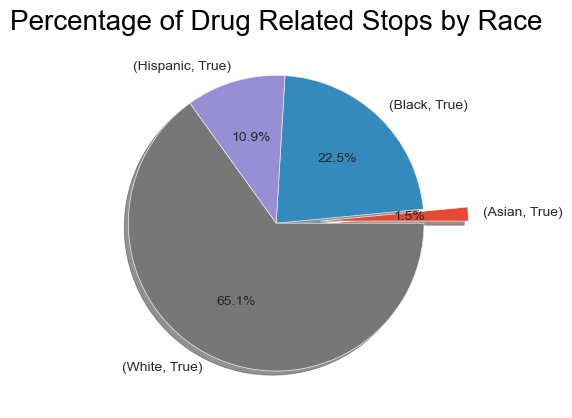

In [63]:
e = [0.3, 0, 0, 0]
drug_related_stops_by_race.plot(kind="pie",
                                shadow=True, 
                                autopct="%1.1f%%",
                                explode=e)
plt.title("Percentage of Drug Related Stops by Race",
          fontsize=20,
          color="black")
plt.ylabel("") 
plt.xticks(color="black")
print("Whites have the highest percentage of drug related stops by race at 65.1%, while asians have the lowest percentage at 1.5%.")

26) How many drug related stop were there by gender?

In [64]:
drug_related_stops_by_gender = traffic_violations[traffic_violations["drugs_related_stop"] == True].groupby("driver_gender")["drugs_related_stop"].value_counts()
drug_related_stops_by_gender

driver_gender  drugs_related_stop
F              True                   44
M              True                  351
Name: drugs_related_stop, dtype: int64

Males percentage of drug related stops are overwhelmingly higher than the female percentage of drug related stops.


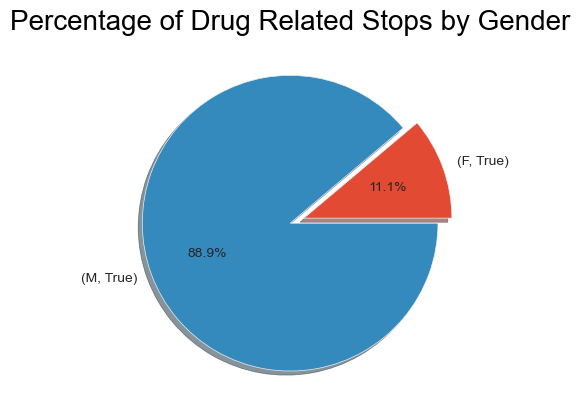

In [65]:
e = [0.1, 0]
drug_related_stops_by_gender.plot(kind="pie",
                                  shadow=True,
                                  autopct="%1.1f%%", 
                                  explode=e)
plt.title("Percentage of Drug Related Stops by Gender",
          color="black",
          fontsize=20) 
plt.ylabel("") 
print("Males percentage of drug related stops are overwhelmingly higher than the female percentage of drug related stops.")

27) How many drug related stops were there a year?

In [66]:
drug_related_stops_per_year = traffic_violations[traffic_violations["drugs_related_stop"] == True].groupby("drugs_related_stop")["stop_year"].value_counts()
drug_related_stops_per_year

drugs_related_stop  stop_year
True                2009         84
                    2007         67
                    2010         61
                    2006         58
                    2008         57
                    2011         50
                    2005         18
Name: stop_year, dtype: int64

The year 2009 had the highest drug related stops with 84, and the year 2005 had the lowest drug related stops with 18.


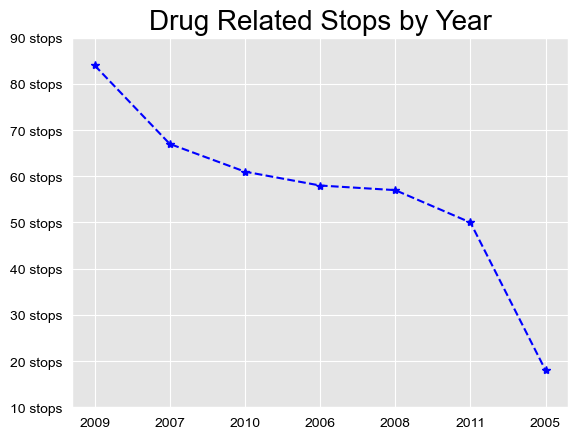

In [67]:
drug_related_stops_per_year.plot(kind="line",
                                 linestyle="--",
                                 marker="*",
                                 label="line with marker",
                                 color="blue")
plt.title("Drug Related Stops by Year",
          fontsize=20,
          color="black")
stops = list(range(10,100,10))
plt.yticks(stops, [f"{s} stops" for s in stops], 
           color="black") 
plt.xticks([0,1,2,3,4,5,6],
           ["2009", "2007", "2010", "2006", "2008", "2011", "2005"],
           color="black") 
plt.xlabel("") 
print("The year 2009 had the highest drug related stops with 84, and the year 2005 had the lowest drug related stops with 18.")